In [1]:
import face_recognition
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

In [2]:
# Import images
known_face_encodings = []
known_face_names = []
faces_encodings = []
face_names = []
face_locations = []
train_files = []
test_files = []
process_this_frame = True

ext = ['png', 'jpg', 'jpeg']
cur_dir = os.getcwd()
train_path = os.path.join(cur_dir, 'data/train/')
test_path = os.path.join(cur_dir, 'data/test/')
[train_files.extend(glob.glob(train_path + '*.' + e)) for e in ext]
[test_files.extend(glob.glob(test_path + '*.' + e)) for e in ext]
num_train_files = len(train_files)
names = train_files.copy()

In [3]:
# Perform training
for i in range(num_train_files):
    globals()['image_{}'.format(i)] = face_recognition.load_image_file(train_files[i])
    globals()['image_encoding_{}'.format(i)] = face_recognition.face_encodings(globals()['image_{}'.format(i)])[0]
    known_face_encodings.append(globals()['image_encoding_{}'.format(i)])

    # Create array of known names
    names[i] = names[i].replace(train_path, "").split(".")[0]  
    known_face_names.append(names[i])


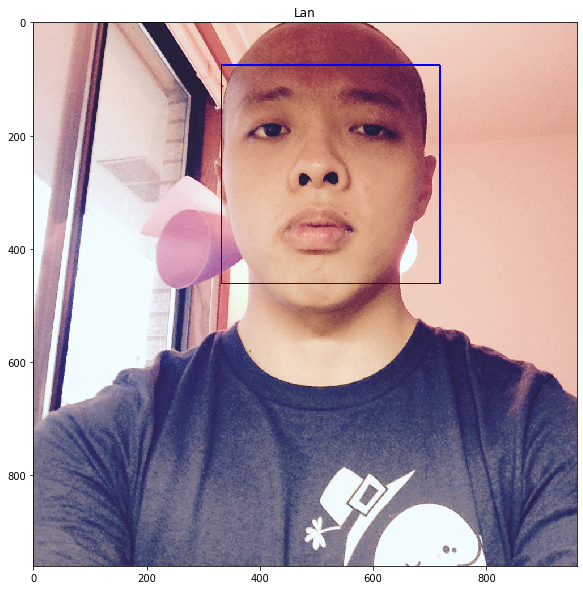

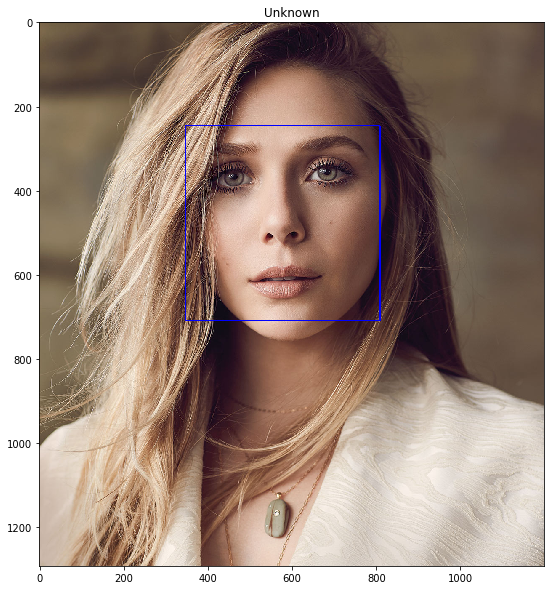

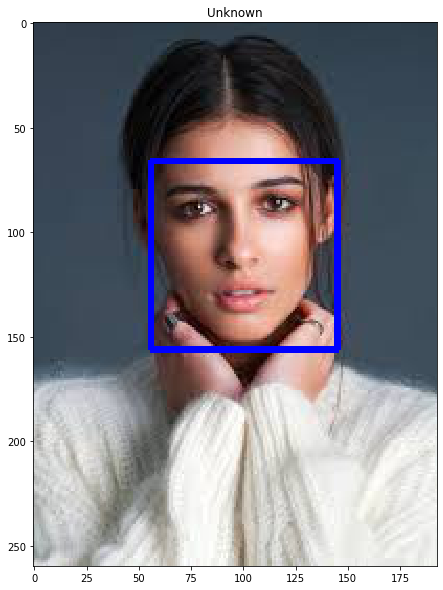

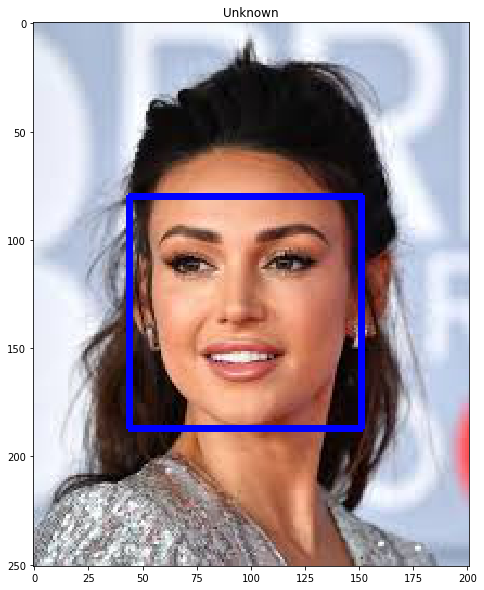

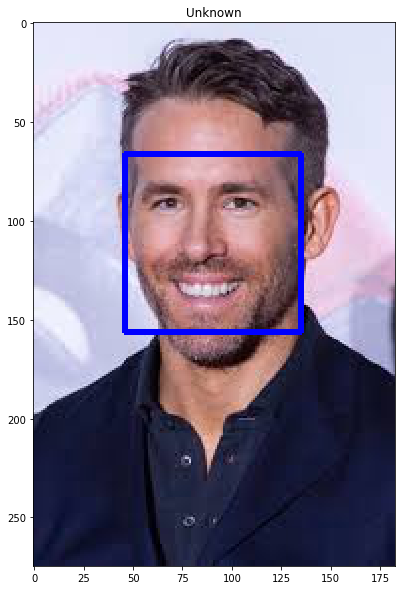

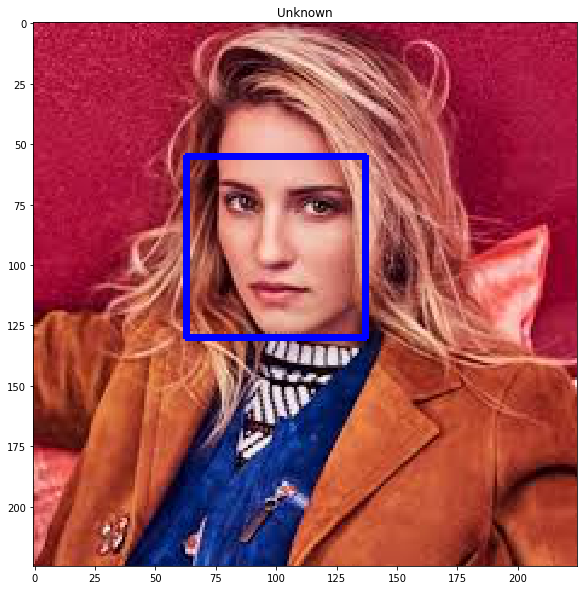

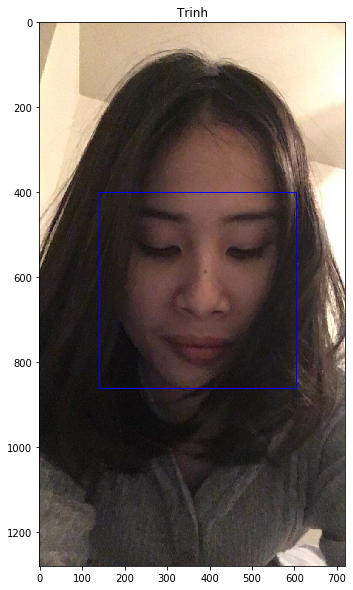

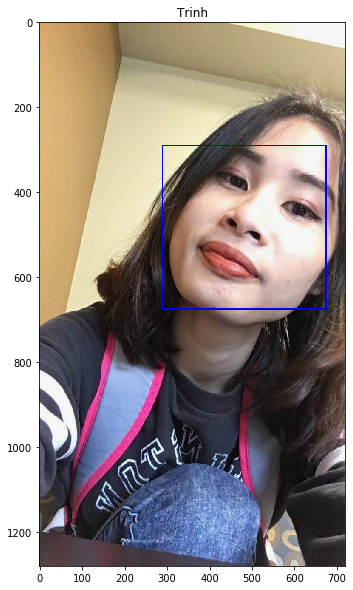

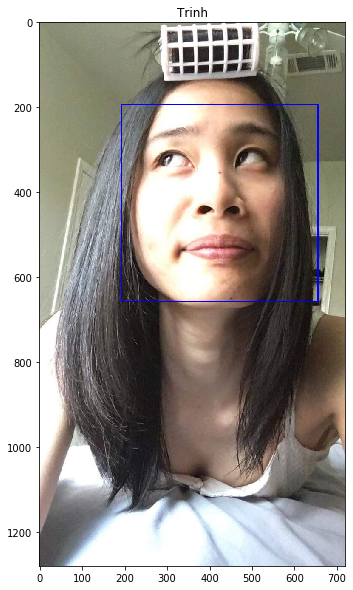

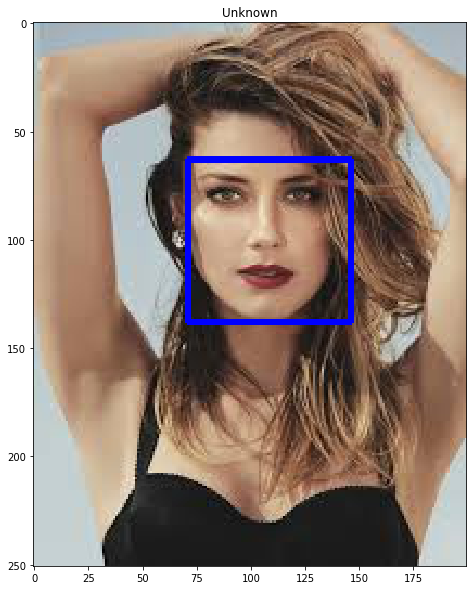

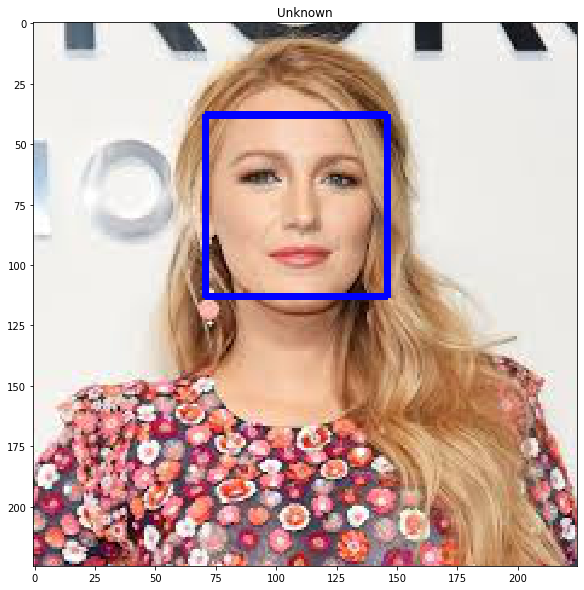

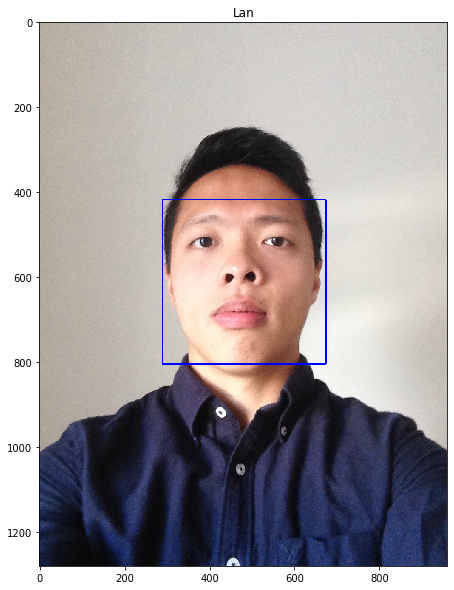

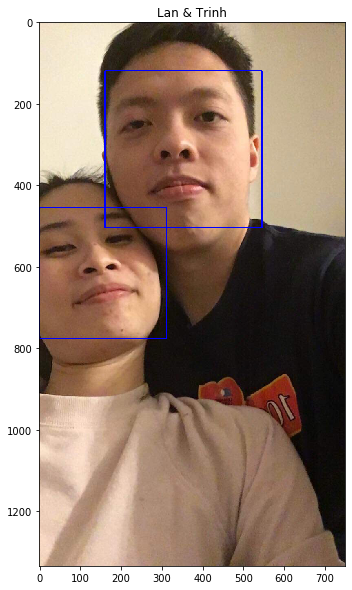

In [4]:
def process_image(img_file):
    cur_img = face_recognition.load_image_file(img_file)
    face_locations = face_recognition.face_locations(cur_img)
    face_encodings = face_recognition.face_encodings(cur_img, face_locations)
    
    face_names = []
    for face_encoding in face_encodings:
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"
        
        # # If a match was found in known_face_encodings, just use the first one.
        # if True in matches:
        #     first_match_index = matches.index(True)
        #     name = known_face_names[first_match_index]

        # Or instead, use the known face with the smallest distance to the new face
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)
    
    # Display the results
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # Draw a box around the face
        cv2.rectangle(cur_img, (left, top), (right, bottom), (0, 0, 255), 2)
        
        """
        # Draw a label with a name below the face
        cv2.rectangle(cur_img, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(cur_img, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
        """
    
    # Display the resulting image
    title = ''
    for i in range(len(face_names)):
        n = face_names[i]
        if not i == 0:
            title = title + " & "
        title += n
    
    plt.figure(figsize=(30, 10))
    plt.title(title)
    plt.imshow(cur_img)
    plt.show()


# Process images in test folder
for file in test_files:
    process_image(file)

Reference: <br/>
https://towardsdatascience.com/building-a-face-recognizer-in-python-7fd6630c6340 <br/>
https://github.com/ageitgey/face_recognition